In [ ]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from time import sleep
import pandas as pd
import math
import random

In [ ]:
def plot_bar_3(susceptible, infected, vaccinated, recovered,population):
  N=4
  ind=np.arange(N)
  width=0.3

  
  fig = plt.subplots(figsize =(10, 7)) 
  bars = np.add(susceptible, infected).tolist()
  bars2=np.add(bars, vaccinated).tolist()

  p1 = plt.bar(ind, susceptible, width) 
  p2 = plt.bar(ind, infected,width, bottom=susceptible) 
  p3 = plt.bar(ind, vaccinated,width, bottom=bars) 
  p4 = plt.bar(ind, recovered ,width, bottom=bars2) 
  
  plt.ylabel('Headcount') 
  plt.title('Animation showing the change in number of people in each subclass overtime') 
  plt.xticks(ind, ('Medical', 'High-Risk', 'Essential', 'Low-Risk')) 
  plt.yticks(np.arange(0, population/4, population/4/10)) 
  plt.legend((p1[0], p2[0], p3[0], p4[0]), ('susceptible', 'infected','vaccinated','recovered')) 
  
  plt.show()

In [ ]:
k=3
R_0=1.5

In [ ]:
def run_SIR_clusters_2(k_high,k_low,n,R_0,p_i,p_vac,p_dosage):
    """
    Run SIR simulation
    ----------
    k_high: (int) number of average meetings (higher)
    k_low: (int) number of average meetings (lower)
    n: number of people in the entire populatin (n/4 per cluster)
    R_0: basic reproduction number (number of people you can infect if you are infected)
    p_i: probability of infected with symptoms (array)
    p_vac: probability of each class receiving a vaccine (array)
    p_dosage: percentage of the total population that recives the vaccine daily
    Returns
    ---------
    nodes_R: Number of people who got infected and recovered
    """
    

    medical_infected = random.sample(range(int(0),int(n/4)),500) # infected medical worker
    essential_infected = random.sample(range(int(n/4),int(n/2)),2500) # infected essential worker
    high_risk_infected = random.sample(range(int(n/2),int(3*n/4)),2500) # infected high-risk person
    low_risk_infected = random.sample(range(int(3*n/4),int(n)),2500) # infected low-risk preson
    nodes_S_medical = np.arange(0,n/4).tolist() # remove infected agent from cluster


    medical_vac = []
    essential_vac = []
    high_risk_vac = []
    low_risk_vac = []

    day = 0 

    num_dosage = p_dosage*n # number of vaccine dosage available daily
    leftover_vaccine = 0 # number of leftover vaccine 

    for each in medical_infected:
      nodes_S_medical.remove(each)
    nodes_S_essential = np.arange(n/4,n/2).tolist() # remove infected agent from cluster

    for each in essential_infected:
      nodes_S_essential.remove(each)
    
    nodes_S_high_risk = np.arange(n/2,3*n/4).tolist() # remove infected agent from cluster

    for each in high_risk_infected:
      nodes_S_high_risk.remove(each)
    nodes_S_low_risk = np.arange(3*n/4,n).tolist() # remove infected agent from cluster

    for each in low_risk_infected:
      nodes_S_low_risk.remove(each)

    nodes_I_medical = {} # dictionary in the format of (index,'A'/'S') with A being asymptomatic and S being symptomatic
    nodes_I_essential = {}
    nodes_I_high_risk = {}
    nodes_I_low_risk = {}

    for each in medical_infected:
      nodes_I_medical[each] = 'S'

    for each in essential_infected:
      nodes_I_essential[each] = 'S'
    
    for each in high_risk_infected:
      nodes_I_high_risk[each] = 'S'

    for each in low_risk_infected:
      nodes_I_low_risk[each] = 'S'


    nodes_R_medical = [] # recovered medical 
    nodes_R_high_risk = [] # recovered high risk
    nodes_R_essential = [] # recovered essential
    nodes_R_low_risk = [] # recovered low risk


    #num_infected = len(nodes_I_essential) + len(nodes_I_high_risk) + len(nodes_I_low_risk) + len(nodes_I_medical)
    #num_sus = len(nodes_S_essential) + len(nodes_S_high_risk) + len(nodes_S_low_risk) + len(nodes_S_medical)
    h = k_high/(n-1)
    l = k_low/(n-1)


    beta = (k_high+k_low)/2/R_0 # recovery rate (we took the average of k_high and k_low)

    lambda_matrix = [[h,h,l,l],[l,h,l,l],[l,h,l,l],[l,h,l,l],[h,h,h,h]]
    
    total_11 = len(nodes_S_medical)*sum(value == 'A' for value in nodes_I_medical.values())*lambda_matrix[0][0] # susceptible medical meets asymptomatic infected medical
    total_12 = len(nodes_S_medical)*sum(value == 'A' for value in nodes_I_essential.values())*lambda_matrix[0][1] # susceptible medical meets asymptomatic infected essential
    total_13 = len(nodes_S_medical)*sum(value == 'A' for value in nodes_I_high_risk.values())*lambda_matrix[0][2] # susceptible medical meets asymptomatic infected high-risk
    total_14 = len(nodes_S_medical)*sum(value == 'A' for value in nodes_I_low_risk.values())*lambda_matrix[0][3] # susceptible medical meets asymptomatic infected low-risk
    total_21 = len(nodes_S_essential)*sum(value == 'A' for value in nodes_I_medical.values())*lambda_matrix[1][0] # susceptible essential meets asymptomatic infected medical
    total_22 = len(nodes_S_essential)*sum(value == 'A' for value in nodes_I_essential.values())*lambda_matrix[1][1] # susceptible essential meets asymptomatic infected essential
    total_23 = len(nodes_S_essential)*sum(value == 'A' for value in nodes_I_high_risk.values())*lambda_matrix[1][2] # susceptible essential meets asymptomatic infected high risk
    total_24 = len(nodes_S_essential)*sum(value == 'A' for value in nodes_I_low_risk.values())*lambda_matrix[1][3] # susceptible essential meets asymptomatic infected low risk
    total_31 = len(nodes_S_high_risk)*sum(value == 'A' for value in nodes_I_medical.values())*lambda_matrix[2][0] # susceptible high risk meets asymptomatic infected medical
    total_32 = len(nodes_S_high_risk)*sum(value == 'A' for value in nodes_I_essential.values())*lambda_matrix[2][1] # susceptible high risk meets asymptomatic infected essential
    total_33 = len(nodes_S_high_risk)*sum(value == 'A' for value in nodes_I_high_risk.values())*lambda_matrix[2][2] # susceptible high risk meets asymptomatic infected high risk
    total_34 = len(nodes_S_high_risk)*sum(value == 'A' for value in nodes_I_low_risk.values())*lambda_matrix[2][3] # susceptible high risk meets asymptomatic infected low risk
    total_41 = len(nodes_S_low_risk)*sum(value == 'A' for value in nodes_I_medical.values())*lambda_matrix[3][0] # susceptible low risk meets asymptomatic infected medical
    total_42 = len(nodes_S_low_risk)*sum(value == 'A' for value in nodes_I_essential.values())*lambda_matrix[3][1] # susceptible low risk meets asymptomatic infected essential
    total_43 = len(nodes_S_low_risk)*sum(value == 'A' for value in nodes_I_high_risk.values())*lambda_matrix[3][2] # susceptible low risk meets asymptomatic infected high risk
    total_44 = len(nodes_S_low_risk)*sum(value == 'A' for value in nodes_I_low_risk.values())*lambda_matrix[3][3] # susceptible low risk meets asymptomatic infected low risk

    #infected agents from all four classes can meet suscpetible medical workers in C1
    total_11s = len(nodes_S_medical)*sum(value == 'S' for value in nodes_I_medical.values())*lambda_matrix[4][0]
    total_12s = len(nodes_S_medical)*sum(value == 'S' for value in nodes_I_essential.values())*lambda_matrix[4][1]
    total_13s = len(nodes_S_medical)*sum(value == 'S' for value in nodes_I_high_risk.values())*lambda_matrix[4][2]
    total_14s = len(nodes_S_medical)*sum(value == 'S' for value in nodes_I_low_risk.values())*lambda_matrix[4][3]
    
    rate_recover = beta*(len(nodes_I_medical) + len(nodes_I_essential) + len(nodes_I_high_risk) + len(nodes_I_low_risk))
    rate_total = total_11 + total_12 + total_13 + total_14 + total_21 + total_22 + total_23 + total_24 + total_31 + total_32 + total_33 + total_34 + total_41 + total_42 + total_43 + total_44 + rate_recover +total_11s + total_12s+ total_13s+ total_14s
    t = 0
    times = []
    nextEvent = t + np.random.exponential(1/rate_total)

    counter = 0
    num_vaccine = [int(num_dosage*p_vac[0]),int(num_dosage*p_vac[1]),int(num_dosage*p_vac[2]),int(num_dosage*p_vac[3])]
    leftover_vaccine = 0

    type_event = [0]*20


    while (len(nodes_S_medical)!=0 or len(nodes_S_essential)!=0 or len(nodes_S_high_risk)!=0 or len(nodes_S_low_risk)!=0) and (len(nodes_I_medical)!=0 or len(nodes_I_essential)!=0 or len(nodes_I_high_risk)!=0 or len(nodes_I_low_risk)!=0): # no more susceptible or infected individuals


        counter = counter + 1
        t = t + nextEvent
        times.append(t)

        #check to see if it is a new day. if so, make more vaccines available
        while t - day >= 1:
            day = day + 1
            num_vaccine = [int(num_dosage*p_vac[0]),int(num_dosage*p_vac[1]),int(num_dosage*p_vac[2]),int(num_dosage*p_vac[3])] # number of vaccine for each class in an array format

        #Simplifying assumption: when vaccines are made available, susceptible 
        #agents will immediately claim these vaccines before interacting with
        #any other agents.

        
        num_vaccine[0] = num_vaccine[0] + leftover_vaccine
        leftover_vaccine = 0

        # first order: distribution of vaccine to medical 
        if len(nodes_S_medical) != 0 :
          # if there are more infected medical workers than vaccine
          if len(nodes_S_medical) >= num_vaccine[0]:
            for each in range(num_vaccine[0]):
              i = nodes_S_medical[0]
              medical_vac.append(i)
              nodes_S_medical.remove(i)
            num_vaccine[0] = 0

          # if there are more vaccines than there are infected medical workers
          else:
            for each in range(len(nodes_S_medical)):
              i = nodes_S_medical[0]
              medical_vac.append(i)
              nodes_S_medical.remove(i)
            num_vaccine[1] = num_vaccine[1] + (num_vaccine[0]-len(nodes_S_medical))
            num_vaccine[0] = 0

        # second order: distribution of vaccine to high risk 
        if len(nodes_S_high_risk)!=0:
          # if there are more infected high risk individuals than vaccine
          if len(nodes_S_high_risk) >= num_vaccine[1]:
            for each in range(num_vaccine[1]):
              i = nodes_S_high_risk[0]
              high_risk_vac.append(i)
              nodes_S_high_risk.remove(i)
            num_vaccine[1] = 0

          # if there are more vaccines than there are infected medical workers
          else:
            for each in range(len(nodes_S_high_risk)):
              i = nodes_S_high_risk[0]
              high_risk_vac.append(i)
              nodes_S_high_risk.remove(i)
            num_vaccine[2] = num_vaccine[2] + (num_vaccine[1]-len(nodes_S_high_risk))
            num_vaccine[1] = 0

        # third order: distribution of vaccine to essential
        if len(nodes_S_essential)!=0:
          # if there are more infected essential individuals than vaccine
          if len(nodes_S_essential) >= num_vaccine[2]:
            for each in range(num_vaccine[2]):
              i = nodes_S_essential[0]
              essential_vac.append(i)
              nodes_S_essential.remove(i)
            num_vaccine[2] = 0

          # if there are more vaccines than there are infected essential workers
          else:
            for each in range(len(nodes_S_high_risk)):
              i = nodes_S_high_risk[0]
              essential_vac.append(i)
              nodes_S_essential.remove(i)
            num_vaccine[3] = num_vaccine[3] + (num_vaccine[2]-len(nodes_S_essential))
            num_vaccine[2] = 0

        # fourth order: distribution of vaccine to low risk
        if len(nodes_S_low_risk)!=0:
          # if there are more infected essential individuals than vaccine
          if len(nodes_S_low_risk) >= num_vaccine[3]:
            for each in range(num_vaccine[3]):
              i = nodes_S_low_risk[0]
              low_risk_vac.append(i)
              nodes_S_low_risk.remove(i)
            num_vaccine[3] = 0

          # if there are more vaccines than there are infected essential workers
          else:
            for each in range(len(nodes_S_low_risk)):
              i = nodes_S_low_risk[0]
              low_risk_vac.append(i)
              nodes_S_low_risk.remove(i)
            leftover_vaccine = num_vaccine[3]-len(nodes_S_low_risk)
            num_vaccine[3] = 0

        U = np.random.rand()

        events = [0, 
                  total_11/rate_total, 
                  (total_11+total_12)/rate_total, 
                  (total_11+total_12+total_13)/rate_total, 
                  (total_11+total_12+total_13+total_14)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23)/rate_total, 
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24+total_31)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24+total_31+total_32)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24+total_31+total_32+total_33)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24+total_31+total_32+total_33+total_34)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24+total_31+total_32+total_33+total_34+total_41)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24+total_31+total_32+total_33+total_34+total_41+total_42)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24+total_31+total_32+total_33+total_34+total_41+total_42+total_43)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24+total_31+total_32+total_33+total_34+total_41+total_42+total_43+total_44)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24+total_31+total_32+total_33+total_34+total_41+total_42+total_43+total_44+total_11s)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24+total_31+total_32+total_33+total_34+total_41+total_42+total_43+total_44+total_11s+total_12s)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24+total_31+total_32+total_33+total_34+total_41+total_42+total_43+total_44+total_11s+total_12s+total_13s)/rate_total,
                  (total_11+total_12+total_13+total_14+total_21+total_22 + total_23+total_24+total_31+total_32+total_33+total_34+total_41+total_42+total_43+total_44+total_11s+total_12s+total_13s+total_14s)/rate_total]
        

        # scenario 1: susceptible medical meets infected medical   
        if events[0]<= U<= events[1] and len(nodes_S_medical)!=0:
            i=np.random.choice(nodes_S_medical)
           # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[0]: # symptomatic
                nodes_I_medical[i] = 'S'
                nodes_S_medical.remove(i)
            else: # asymptomatic
                nodes_I_medical[i] = 'A'
                nodes_S_medical.remove(i)
            
            type_event[0] = type_event[0] + 1

        # scenario 2: susceptible medical meets infected essential
        elif U <= events[2] and len(nodes_S_medical)!=0:
            i = np.random.choice(nodes_S_medical)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[0]: # symptomatic
                nodes_I_medical[i] = 'S'
                nodes_S_medical.remove(i)
            else: # asymptomatic
                nodes_I_medical[i] = 'A'
                nodes_S_medical.remove(i)

            type_event[1] = type_event[1] + 1

        # scenario 3: susceptible medical meets infected high risk
        elif U <=events[3] and len(nodes_S_medical)!=0:
            i = np.random.choice(nodes_S_medical)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[0]: # symptomatic
                nodes_I_medical[i] = 'S'
                nodes_S_medical.remove(i)
            else: # asymptomatic
                nodes_I_medical[i] = 'A'
                nodes_S_medical.remove(i)

            type_event[2] = type_event[2] + 1
            
        # scenario 4: susceptible medical meets infected low risk
        elif U<=events[4] and len(nodes_S_medical)!=0:
            i = np.random.choice(nodes_S_medical)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[0]: # symptomatic
                nodes_I_medical[i] = 'S'
                nodes_S_medical.remove(i)
            else: # asymptomatic
                nodes_I_medical[i] = 'A'
                nodes_S_medical.remove(i)

            type_event[3] = type_event[3] + 1

        # scenario 5: susceptible essential meets infected medical
        elif U<=events[5] and len(nodes_S_essential)!=0:
            i = np.random.choice(nodes_S_essential)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[1]: # symptomatic
                nodes_I_essential[i] = 'S'
                nodes_S_essential.remove(i)
            else: # asymptomatic
                nodes_I_essential[i] = 'A'
                nodes_S_essential.remove(i)
            
            type_event[4] = type_event[4] + 1

        # scenario 6: susceptible essential meets infected essential
        elif U<=events[6] and len(nodes_S_essential)!=0:
            i = np.random.choice(nodes_S_essential)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[1]: # symptomatic
                nodes_I_essential[i] = 'S'
                nodes_S_essential.remove(i)
            else: # asymptomatic
                nodes_I_essential[i] = 'A'
                nodes_S_essential.remove(i)
    

            type_event[5] = type_event[5] + 1

        # scenario 7: susceptible essential meets infected high risk
        elif U<=events[7] and len(nodes_S_essential)!=0:
            i = np.random.choice(nodes_S_essential)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[1]: # symptomatic
                nodes_I_essential[i] = 'S'
                nodes_S_essential.remove(i)
            else: # asymptomatic
                nodes_I_essential[i] = 'A'
                nodes_S_essential.remove(i)
            
            type_event[6] = type_event[6] + 1
        # scenario 8: susceptible essential meets infected low risk
        elif U<=events[8] and len(nodes_S_essential)!=0:
            i = np.random.choice(nodes_S_essential)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[1]: # symptomatic
                nodes_I_essential[i] = 'S'
                nodes_S_essential.remove(i)
            else: # asymptomatic
                nodes_I_essential[i] = 'A'
                nodes_S_essential.remove(i)

            type_event[7] = type_event[7] + 1
        # scenario 9: susceptible high risk meets infected medical
        elif U<=events[9] and len(nodes_S_high_risk)!=0:
            i = np.random.choice(nodes_S_high_risk)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[2]: # symptomatic
                nodes_I_high_risk[i] = 'S'
                nodes_S_high_risk.remove(i)
            else: # asymptomatic
                nodes_I_high_risk[i] = 'A'
                nodes_S_high_risk.remove(i)

            type_event[8] = type_event[8] + 1

        # scenario 10: susceptible high risk meets infected essential
        elif U<=events[10] and len(nodes_S_high_risk)!=0:
            i = np.random.choice(nodes_S_high_risk)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[2]: # symptomatic
                nodes_I_high_risk[i] = 'S'
                nodes_S_high_risk.remove(i)
            else: # asymptomatic
                nodes_I_high_risk[i] = 'A'
                nodes_S_high_risk.remove(i)

            type_event[9] = type_event[9] + 1
        # scenario 11: susceptible high risk meets infected high risk
        elif U<=events[11] and len(nodes_S_high_risk)!=0:
            i = np.random.choice(nodes_S_high_risk)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[2]: # symptomatic
                nodes_I_high_risk[i] = 'S'
                nodes_S_high_risk.remove(i)
            else: # asymptomatic
                nodes_I_high_risk[i] = 'A'
                nodes_S_high_risk.remove(i)

            type_event[10] = type_event[10] + 1
        # scenario 12: susceptible high risk meets infected low risk
        elif U<=events[12] and len(nodes_S_high_risk)!=0:
            i = np.random.choice(nodes_S_high_risk)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[2]: # symptomatic
                nodes_I_high_risk[i] = 'S'
                nodes_S_high_risk.remove(i)
            else: # asymptomatic
                nodes_I_high_risk[i] = 'A'
                nodes_S_high_risk.remove(i)
            
            type_event[11] = type_event[11] + 1
        # scenario 13: susceptible low risk meets infected medical
        elif U<=events[13] and len(nodes_S_low_risk)!=0:
            i = np.random.choice(nodes_S_low_risk)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[3]: # symptomatic
                nodes_I_low_risk[i] = 'S'
                nodes_S_low_risk.remove(i)
            else: # asymptomatic
                nodes_I_low_risk[i] = 'A'
                nodes_S_low_risk.remove(i)
            
            type_event[12] = type_event[12] + 1
        # scenario 14: susceptible low risk meets infected essential
        elif U<=events[14] and len(nodes_S_low_risk)!=0:
            i = np.random.choice(nodes_S_low_risk)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[3]: # symptomatic
                nodes_I_low_risk[i] = 'S'
                nodes_S_low_risk.remove(i)
            else: # asymptomatic
                nodes_I_low_risk[i] = 'A'
                nodes_S_low_risk.remove(i)

            type_event[13] = type_event[13] + 1
        # scenario 15: susceptible low risk meets infected high risk
        elif U<=events[15] and len(nodes_S_low_risk)!=0:
            i = np.random.choice(nodes_S_low_risk)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[3]: # symptomatic
                nodes_I_low_risk[i] = 'S'
                nodes_S_low_risk.remove(i)
            else: # asymptomatic
                nodes_I_low_risk[i] = 'A'
                nodes_S_low_risk.remove(i)
            
            type_event[14] = type_event[14] + 1
        # scenario 16: susceptible low risk meets infected low risk
        elif U<=events[16] and len(nodes_S_low_risk)!=0:
            i = np.random.choice(nodes_S_low_risk)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[3]: # symptomatic
                nodes_I_low_risk[i] = 'S'
                nodes_S_low_risk.remove(i)
            else: # asymptomatic
                nodes_I_low_risk[i] = 'A'
                nodes_S_low_risk.remove(i)
            
            type_event[15] = type_event[15] + 1

        # scenario 17: susceptible medical meets symptomatic infected medical
        elif U<=events[17] and len(nodes_S_medical)!=0:
            i = np.random.choice(nodes_S_medical)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[3]: # symptomatic
                nodes_I_medical[i] = 'S'
                nodes_S_medical.remove(i)
            else: # asymptomatic
                nodes_I_medical[i] = 'A'
                nodes_S_medical.remove(i)
            
            type_event[16] = type_event[16] + 1

        
        # scenario 18: susceptible medical meets symptomatic infected essential workers
        elif U<=events[18] and len(nodes_S_medical)!=0:
            i = np.random.choice(nodes_S_medical)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[3]: # symptomatic
                nodes_I_medical[i] = 'S'
                nodes_S_medical.remove(i)
            else: # asymptomatic
                nodes_I_medical[i] = 'A'
                nodes_S_medical.remove(i)

            type_event[17] = type_event[17] + 1
        # scenario 19: susceptible medical meets symptomatic infected high risk workers
        elif U<=events[19] and len(nodes_S_medical)!=0:
            i = np.random.choice(nodes_S_medical)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[3]: # symptomatic
                nodes_I_medical[i] = 'S'
                nodes_S_medical.remove(i)
            else: # asymptomatic
                nodes_I_medical[i] = 'A'
                nodes_S_medical.remove(i)

            type_event[18] = type_event[18] + 1
        # scenario 20: susceptible medical meets symptomatic infected low risk workers
        elif U<=events[20] and len(nodes_S_medical)!=0:
            i = np.random.choice(nodes_S_medical)
            # determine whether symptomatic or asymptomatic
            p_symptom = np.random.uniform(0,1)
            if p_symptom <= p_i[3]: # symptomatic
                nodes_I_medical[i] = 'S'
                nodes_S_medical.remove(i)
            else: # asymptomatic
                nodes_I_medical[i] = 'A'
                nodes_S_medical.remove(i)
            
            type_event[19] = type_event[19] + 1

        # recovery
        else:
  
            i = np.random.choice(list(nodes_I_medical.keys()) + list(nodes_I_essential.keys()) + list(nodes_I_high_risk.keys()) + list(nodes_I_low_risk.keys())) # choose random infected person to recover

            # find out which class the recovered agent is in
            if i in nodes_I_medical.keys():
                nodes_R_medical.append(i)
                del nodes_I_medical[i]
            elif i in nodes_I_essential.keys():
                nodes_R_essential.append(i)
                del nodes_I_essential[i]
            elif i in nodes_I_high_risk.keys():
                nodes_R_high_risk.append(i)
                del nodes_I_high_risk[i]
            else:
                nodes_R_low_risk.append(i)
                del nodes_I_low_risk[i]
        
        total_11 = len(nodes_S_medical)*sum(value == 'A' for value in nodes_I_medical.values())*lambda_matrix[0][0] # susceptible medical meets asymptomatic infected medical
        total_12 = len(nodes_S_medical)*sum(value == 'A' for value in nodes_I_essential.values())*lambda_matrix[0][1] # susceptible medical meets asymptomatic infected essential
        total_13 = len(nodes_S_medical)*sum(value == 'A' for value in nodes_I_high_risk.values())*lambda_matrix[0][2] # susceptible medical meets asymptomatic infected high-risk
        total_14 = len(nodes_S_medical)*sum(value == 'A' for value in nodes_I_low_risk.values())*lambda_matrix[0][3] # susceptible medical meets asymptomatic infected low-risk
        total_21 = len(nodes_S_essential)*sum(value == 'A' for value in nodes_I_medical.values())*lambda_matrix[1][0] # susceptible essential meets asymptomatic infected medical
        total_22 = len(nodes_S_essential)*sum(value == 'A' for value in nodes_I_essential.values())*lambda_matrix[1][1] # susceptible essential meets asymptomatic infected essential
        total_23 = len(nodes_S_essential)*sum(value == 'A' for value in nodes_I_high_risk.values())*lambda_matrix[1][2] # susceptible essential meets asymptomatic infected high risk
        total_24 = len(nodes_S_essential)*sum(value == 'A' for value in nodes_I_low_risk.values())*lambda_matrix[1][3] # susceptible essential meets asymptomatic infected low risk
        total_31 = len(nodes_S_high_risk)*sum(value == 'A' for value in nodes_I_medical.values())*lambda_matrix[2][0] # susceptible high risk meets asymptomatic infected medical
        total_32 = len(nodes_S_high_risk)*sum(value == 'A' for value in nodes_I_essential.values())*lambda_matrix[2][1] # susceptible high risk meets infected essential
        total_33 = len(nodes_S_high_risk)*sum(value == 'A' for value in nodes_I_high_risk.values())*lambda_matrix[2][2] # susceptible high risk meets infected high risk
        total_34 = len(nodes_S_high_risk)*sum(value == 'A' for value in nodes_I_low_risk.values())*lambda_matrix[2][3] # susceptible high risk meets infected low risk
        total_41 = len(nodes_S_low_risk)*sum(value == 'A' for value in nodes_I_medical.values())*lambda_matrix[3][0] # susceptible low risk meets infected medical
        total_42 = len(nodes_S_low_risk)*sum(value == 'A' for value in nodes_I_essential.values())*lambda_matrix[3][1] # susceptible low risk meets infected essential
        total_43 = len(nodes_S_low_risk)*sum(value == 'A' for value in nodes_I_high_risk.values())*lambda_matrix[3][2] # susceptible low risk meets infected high risk
        total_44 = len(nodes_S_low_risk)*sum(value == 'A' for value in nodes_I_low_risk.values())*lambda_matrix[3][3] # susceptible low risk meets infected low risk

        total_11s = len(nodes_S_medical)*sum(value == 'S' for value in nodes_I_medical.values())*lambda_matrix[4][0]
        total_12s = len(nodes_S_medical)*sum(value == 'S' for value in nodes_I_essential.values())*lambda_matrix[4][1]
        total_13s = len(nodes_S_medical)*sum(value == 'S' for value in nodes_I_high_risk.values())*lambda_matrix[4][2]
        total_14s = len(nodes_S_medical)*sum(value == 'S' for value in nodes_I_low_risk.values())*lambda_matrix[4][3]

        rate_recover = beta*(len(nodes_I_medical) + len(nodes_I_essential) + len(nodes_I_high_risk) + len(nodes_I_low_risk))
        rate_total = total_11 + total_12 + total_13 + total_14 + total_21 + total_22 + total_23 + total_24 + total_31 + total_32 + total_33 + total_34 + total_41 + total_42 + total_43 + total_44 + rate_recover +total_11s + total_12s+ total_13s+ total_14s

        if rate_total>0:
          nextEvent= np.random.exponential(1/rate_total)



        # order: S, I, R, V
        medical_len = [len(nodes_S_medical),len(nodes_I_medical),len(nodes_R_medical),len(medical_vac)]
        essential_len = [len(nodes_S_essential),len(nodes_I_essential),len(nodes_R_essential),len(essential_vac)]
        high_risk_len = [len(nodes_S_high_risk),len(nodes_I_high_risk),len(nodes_R_high_risk),len(high_risk_vac)]
        low_risk_len = [len(nodes_S_low_risk),len(nodes_I_low_risk),len(nodes_R_low_risk),len(low_risk_vac)]

        susceptible = [len(nodes_S_medical),len(nodes_S_high_risk),len(nodes_S_essential),len(nodes_S_low_risk)]
        infected = [len(nodes_I_medical),len(nodes_I_high_risk),len(nodes_I_essential),len(nodes_I_low_risk)]
        vaccinated = [len(medical_vac),len(high_risk_vac),len(essential_vac),len(low_risk_vac)]
        recovered = [len(nodes_R_medical),len(nodes_R_high_risk),len(nodes_R_essential),len(nodes_R_low_risk)]

        
        #plot_bar_3(susceptible, infected, vaccinated, recovered,n)
        #plt.axis('equal')
        #plt.axis('off')
        #plt.show()
        #sleep(0.02)
        #clear_output(wait=True)
        

    return medical_len,high_risk_len,essential_len,low_risk_len,day,type_event

In [ ]:
## Group 1A Model 1: No Social Distancing 

# Since using a for loop is too time-consuming, we ran this manually 10 times and appended the result of each run to a list.
infection = []
days = []
for i in range(10): 
  medical_len, high_risk_len, essential_len, low_risk_len, day, type_event = run_SIR_clusters_2(10,4,100000,1.5,[0.8,0.8,0.8,0.8],[0.25,0.25,0.25,0.25],0.01)

  infection.append((medical_len[1]+high_risk_len[1]+essential_len[1]+low_risk_len[1]+medical_len[2]+high_risk_len[2]+essential_len[2]+low_risk_len[2])/100000)
  days.append(day)
  
print(medical_len)
print(high_risk_len)
print(essential_len)
print(low_risk_len)
print(type_event)
print(day)



[16787, 0, 7463, 750]
[21412, 0, 2838, 750]
[21409, 0, 2841, 750]
[21444, 0, 2806, 750]
[562, 32, 10, 10, 277, 37, 20, 7, 273, 38, 15, 12, 263, 24, 11, 8, 2548, 1257, 1307, 1237]
2


In [ ]:
## Group 1A Model 2: Social Distancing 

# Since using a for loop is too time-consuming, we ran this manually 10 times and appended the result of each run to a list.

infection2 = []
days2 = []

for i in range(10):
  medical_len, high_risk_len, essential_len, low_risk_len, day, type_event = run_SIR_clusters_2(10,6,100000,1.5,[0.8,0.8,0.8,0.8],[0.25,0.25,0.25,0.25],0.01)

  infection2.append((medical_len[1]+high_risk_len[1]+essential_len[1]+low_risk_len[1]+medical_len[2]+high_risk_len[2]+essential_len[2]+low_risk_len[2])/100000)
  days2.append(day)
  
print(medical_len)
print(high_risk_len)
print(essential_len)
print(low_risk_len)
print(type_event)
print(day)

[17991, 0, 6259, 750]
[21403, 0, 2847, 750]
[21417, 0, 2833, 750]
[21414, 0, 2836, 750]
[467, 29, 14, 9, 277, 31, 11, 14, 284, 29, 12, 22, 279, 29, 13, 15, 1888, 1116, 1098, 1138]
2


In [ ]:
import scipy.stats 

LB_infection = np.mean(infection) - scipy.stats.norm.ppf(1-0.05/2)*np.sqrt(np.var(infection)/num_trials) 
UB_infection = np.mean(infection) + scipy.stats.norm.ppf(1-0.05/2)*np.sqrt(np.var(infection)/num_trials)

LB_days = np.mean(days) - scipy.stats.norm.ppf(1-0.05/2)*np.sqrt(np.var(days)/num_trials)
UB_days = np.mean(days) + scipy.stats.norm.ppf(1-0.05/2)*np.sqrt(np.var(days)/num_trials)

In [ ]:
LB_infection, UB_infection
LB_days, UB_days

(2.9140614903086317, 3.2859385096913685)

In [ ]:
medical_len, high_risk_len, essential_len, low_risk_len, day = run_SIR_clusters_2(10,1.5,100000,1.5,[0.8,0.8,0.8,0.8],[0.25,0.25,0.25,0.25],0.01)

print(medical_len)
print(high_risk_len)
print(essential_len)
print(low_risk_len)

infection2.append((medical_len[1]+high_risk_len[1]+essential_len[1]+low_risk_len[1]+medical_len[2]+high_risk_len[2]+essential_len[2]+low_risk_len[2])/100000)
days2.append(day)

[17719, 0, 6281, 1000]
[21367, 0, 2633, 1000]
[21377, 0, 2623, 1000]
[21386, 0, 2614, 1000]


In [ ]:
LB_infection2 = np.mean(infection2) - scipy.stats.norm.ppf(1-0.05/2)*np.sqrt(np.var(infection2)/num_trials) 
UB_infection2 = np.mean(infection2) + scipy.stats.norm.ppf(1-0.05/2)*np.sqrt(np.var(infection2)/num_trials)

LB_days2 = np.mean(days2) - scipy.stats.norm.ppf(1-0.05/2)*np.sqrt(np.var(days2)/num_trials)
UB_days2 = np.mean(days2) + scipy.stats.norm.ppf(1-0.05/2)*np.sqrt(np.var(days2)/num_trials)

In [ ]:
# Comparing 95% CI

print('The 95% CI for percentage of infected individual in total population without social distancing is (', np.round(LB_infection,4), ', ', np.round(UB_infection,4),')')
print('The 95% CI for percentage of infected individual in total population with social distancing is (', np.round(LB_infection2,4), ', ', np.round(UB_infection2,4),')')

print()
print()

print('The 95% CI for the number of days it takes to contain the virus without social distancing is(', np.round(LB_days,4), ', ', np.round(UB_days,4), ')')
print('The 95% CI for the number of days it takes to contain the virus with social distancing is(', np.round(LB_days2,4), ', ', np.round(UB_days2,4), ')')

The 95% CI for percentage of infected individual in total population without social distancing is ( 0.1297 ,  0.1316 )
The 95% CI for percentage of infected individual in total population with social distancing is ( 0.1409 ,  0.1439 )


The 95% CI for the number of days it takes to contain the virus without social distancing is( 2.9141 ,  3.2859 )
The 95% CI for the number of days it takes to contain the virus with social distancing is( 3.6661 ,  4.5339 )


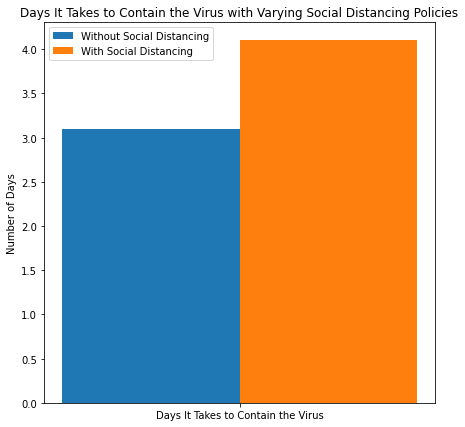

In [ ]:
labels = ['Days It Takes to Contain the Virus']
without_social_distancing = [np.mean(infection),np.mean(days)]
with_social_distancing = [np.mean(infection2),np.mean(days2)]


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars


fig, ax = plt.subplots(figsize=(7,7))

rects1 = ax.bar(x - width/2, without_social_distancing, width, label='Without Social Distancing')
rects2 = ax.bar(x + width/2, with_social_distancing, width, label='With Social Distancing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Days')
ax.set_title('Days It Takes to Contain the Virus with Varying Social Distancing Policies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

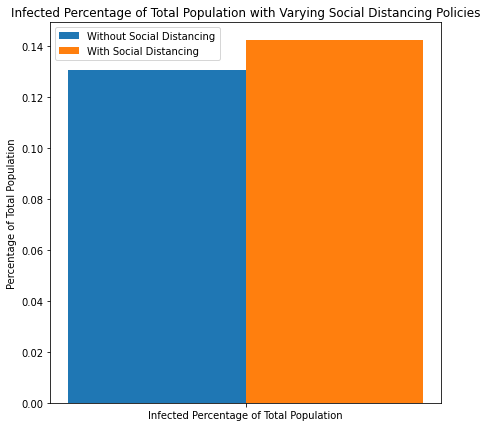

In [ ]:
labels = ['Infected Percentage of Total Population']

without_social_distancing = [np.mean(infection)]
with_social_distancing = [np.mean(infection2)]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(7,7))

rects1 = ax.bar(x - width/2, without_social_distancing, width, label='Without Social Distancing')
rects2 = ax.bar(x + width/2, with_social_distancing, width, label='With Social Distancing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Total Population')
ax.set_title('Infected Percentage of Total Population with Varying Social Distancing Policies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Group 2: Changing Vaccine Doese Availability (keeping meeting rate and vaccine distribution fixed)

In [ ]:
infection = []
days = []

num_trials = 10
for each in range(num_trials):  
  a= run_SIR_clusters_2(10,1.5,100000,1.5,[0,0,0,0],[0.25,0.25,0.25,0.25],0.2)
  infection.append(a[0][2]+a[1][2]+a[2][1]+a[3][2])
  day=a[4]
  days.append(day)


In [ ]:
days

[4, 3, 3, 4, 4, 4, 4, 3, 4, 3]

In [ ]:
#avg infection rate at different vaccine availability:
infect_rate=[]
#avg days at different vaccine availability
days_all=[]
#doses
dosage=[0.01,0.05,0.1,0.15,0.2]

In [ ]:
#store LB and UB at each dose availability
rate_LB=[]
rate_UB=[]
days_LB=[]
days_UB=[]

In [ ]:
days_test_1=[10, 7, 10, 8, 10,9,8,10,7,8]
infect_test_1=[27480,27786,26414,26671,2664,28691, 26671, 26783, 28025, 25234]

In [ ]:
days_test_2=[8, 7, 6, 7, 6, 5, 6, 7, 6, 6]
infect_test_2=[19281, 20655, 20446, 20020, 19256, 19320, 21296, 19249, 19299, 19643]

In [ ]:
days_test_3=[5, 5, 4, 6, 4, 4, 4, 5, 5, 5]
infect_test_3=[15754, 15574, 15128, 15494, 14980, 15191, 14901, 15150, 15262, 15042]

In [ ]:
days_test_4=[4, 4, 4, 3, 4, 4, 5, 4, 5, 4]
infect_test_4=[12921, 13131, 13227, 12528, 12782, 12660, 12693, 12440, 12792, 13072]

In [ ]:
days_test_5=[4, 3, 3, 4, 4, 4, 4, 3, 4, 3]
infect_test_5=[11314, 11503, 11226, 11308, 11650, 11298, 11405, 11691, 11581, 11293]

In [ ]:

population=100000
avg_infect_rate=np.mean(infect_test_5)/population
avg_days=np.mean(days_test_5)

infect_rate.append(avg_infect_rate)
days_all.append(avg_days)
#95% CI
num_trials=10
LB_infection = np.mean(infect_test_5) - sc.norm.ppf(1-0.05/2)*np.sqrt(np.var(infect_test_5)/num_trials) 
UB_infection = np.mean(infect_test_5) + sc.norm.ppf(1-0.05/2)*np.sqrt(np.var(infect_test_5)/num_trials)

LB_days = np.mean(days_test_5) - sc.norm.ppf(1-0.05/2)*np.sqrt(np.var(days_test_5)/num_trials)
UB_days = np.mean(days_test_5) + sc.norm.ppf(1-0.05/2)*np.sqrt(np.var(days_test_5)/num_trials)

print('The 95% CI for the number of infected people is,(', LB_infection,', ', UB_infection, ')')
print('The 95% CI for the number of days it takes to contain the virus is (', LB_days,', ', UB_days, ')')
LB_infect_rate=LB_infection/population
UB_infect_rate=UB_infection/population

rate_LB.append(LB_infect_rate)
rate_UB.append(UB_infect_rate)
days_LB.append(LB_days)
days_UB.append(UB_days)


The 95% CI for the number of infected people is,( 11328.641686366987 ,  11525.158313633012 )
The 95% CI for the number of days it takes to contain the virus is ( 3.2963636851484015 ,  3.9036363148515987 )


In [ ]:
#check 
print(infect_rate)
print(days_all)
print(rate_LB)
print(days_LB)
rate_LB=[0.2006582032471109, 0.1941762680482646, 0.1508539069980223, 0.12671586627236198, 0.11328641686366987]
rate_UB=[0.29217979675288913, 0.20275373195173538, 0.15409809300197772, 0.12977613372763805, 0.11525158313633012]
print(days_UB)

[0.24641900000000003, 0.198465, 0.152476, 0.128246, 0.114269]
[8.7, 6.4, 4.7, 4.1, 3.6]
[0.2006582032471109, 0.1941762680482646, 0.1508539069980223, 0.12671586627236198, 0.11328641686366987]
[7.964034176256892, 5.904163974156351, 4.303137540641019, 3.766230160439668, 3.2963636851484015]
[9.435965823743107, 6.89583602584365, 5.096862459358982, 4.433769839560331, 3.9036363148515987]


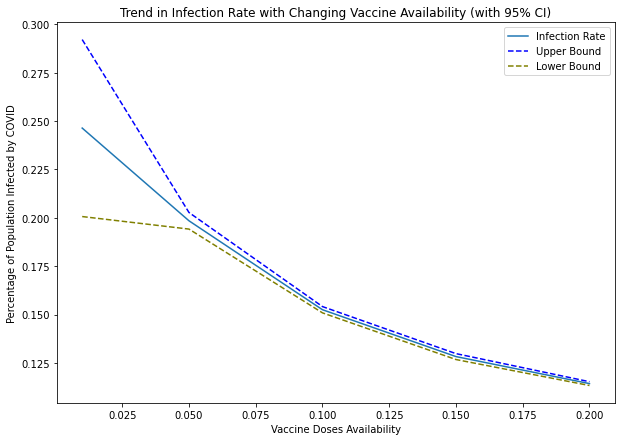

In [ ]:
#Visualizations
plt.figure(figsize=(10,7))

# plot the average 
plt.plot(dosage,infect_rate,label='Infection Rate')

# plot the 95% CI
plt.plot(dosage,rate_UB, color='blue',linestyle='dashed',label='Upper Bound')
plt.plot(dosage,rate_LB, color='olive',linestyle='dashed',label='Lower Bound')

# axes
plt.xlabel('Vaccine Doses Availability')
plt.ylabel('Percentage of Population Infected by COVID')

# title 
plt.title('Trend in Infection Rate with Changing Vaccine Availability (with 95% CI)')
plt.legend()
plt.savefig('infectionrate_vaccinedoeses.png')
plt.show()

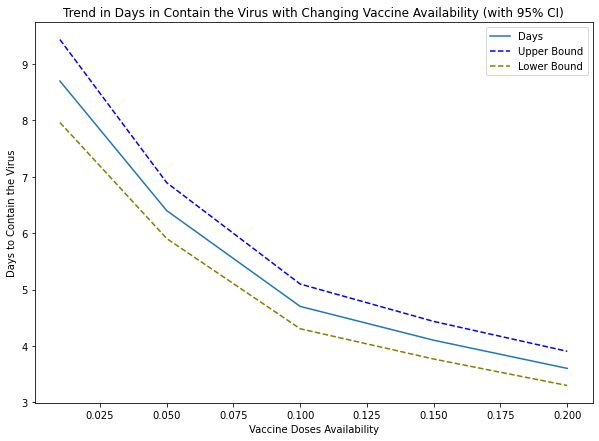

In [ ]:
#Visualizations: plot days to contain the virus 
plt.figure(figsize=(10,7))

# plot the average 
plt.plot(dosage,days_all,label='Days')

# plot the 95% CI
plt.plot(dosage,days_UB, color='blue',linestyle='dashed',label='Upper Bound')
plt.plot(dosage,days_LB, color='olive',linestyle='dashed',label='Lower Bound')

# axes
plt.xlabel('Vaccine Doses Availability')
plt.ylabel('Days to Contain the Virus')

# title 
plt.title('Trend in Days in Contain the Virus with Changing Vaccine Availability (with 95% CI)')
plt.legend()

plt.show()

Group 3: **Change Vaccine Distribution**, While Keeping Vaccine Doses Availability and Social Distancing Constant (3 tests)

In [ ]:
#[0.25, 0.25, 0.25, 0.25], [0.4,0.2,0.2,0.2],[0.2,0.4,0.2,0.2]
infection = []
days = []

num_trials = 10
for each in range(num_trials):  
  a= run_SIR_clusters_2(10,4,100000,1.5,[0,0,0,0],[0.2,0.4,0.2,0.2],0.05)
  infection.append(a[0][2]+a[1][2]+a[2][1]+a[3][2])
  day=a[4]
  days.append(day)


In [ ]:
infection_1=infection
days_1=days
print(infection)
print(days_1)

[28404, 27954, 28695, 28389, 28415, 28303, 29547, 28088, 27920, 28102]
[5, 6, 5, 6, 5, 5, 6, 6, 5, 7]


In [ ]:
infection_2=infection
days_2=days
print(infection_2)
print(days_2)

[28015, 28584, 28328, 28084, 26212, 27601, 25787, 27269, 27707, 28806]
[5, 6, 6, 5, 5, 6, 7, 5, 5, 5]


In [ ]:
infection_3=infection
days_3=days
print(infection_3)
print(days_3)

[27656, 25895, 28226, 27112, 27101, 28283, 26903, 26799, 28082, 27877]
[5, 6, 5, 5, 6, 5, 5, 5, 6, 5]


In [ ]:
#avg infection rate for each distribution
infect_rate=[]
#avg days for each distribution
days_all=[]
#store LB and UB for each distribution 
rate_error=[]
days_error=[]

In [ ]:
population=100000
avg_infect_rate=np.mean(infection)/population
avg_days=np.mean(days)

infect_rate.append(avg_infect_rate)
days_all.append(avg_days)
#95% CI
num_trials=10
error_infect = sc.norm.ppf(1-0.05/2)*np.sqrt(np.var(infection)/num_trials) 
error_days = sc.norm.ppf(1-0.05/2)*np.sqrt(np.var(days)/num_trials)

##print('The 95% CI for the number of infected people is,(', LB_infection,', ', UB_infection, ')')
#print('The 95% CI for the number of days it takes to contain the virus is (', LB_days,', ', UB_days, ')')
error_infect=error_infect/population

rate_error.append(error_infect)
days_error.append(error_days)

In [ ]:
#check
print(infect_rate)
print(days_all)

[0.283817, 0.276393, 0.273934]
[5.6, 5.5, 5.3]


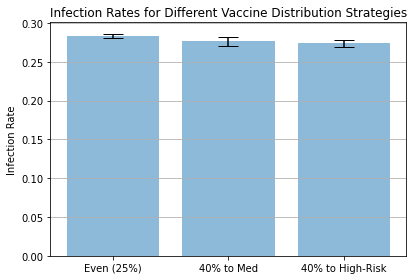

In [ ]:
#Visualization: Bar Plot (with error bars)
import numpy as np
import matplotlib.pyplot as plt

ax = fig.add_axes([0,0,1,1])
dist = ['Even (25%)', '40% to Med', '40% to High-Risk']

x_pos = np.arange(len(dist))
avgrate = infect_rate
error = rate_error

fig, ax = plt.subplots()
ax.bar(x_pos, avgrate, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Infection Rate')
ax.set_xticks(x_pos)
ax.set_xticklabels(dist)
ax.set_title('Infection Rates for Different Vaccine Distribution Strategies')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()


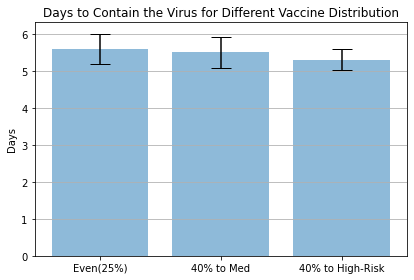

In [ ]:
#Visualization: for Days
import numpy as np
import matplotlib.pyplot as plt
#fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dist = ['Even(25%)', '40% to Med', '40% to High-Risk']

x_pos = np.arange(len(dist))
avgrate = days_all
error = days_error

fig, ax = plt.subplots()
ax.bar(x_pos, avgrate, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Days')
ax.set_xticks(x_pos)
ax.set_xticklabels(dist)
ax.set_title('Days to Contain the Virus for Different Vaccine Distribution')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()